# Naive Bayes Algorithm

**Type** - Supervise Learning Algorithm

**Task** - Classification

**Everything You Need to Know about Naive Bayes Algorithm**

   1. **Bayes' Theorem:**
       . Naive Bayes is based on Bayes' theorem, which is a mathematical formula that helps us update the probability of a hypothesis based on new evidence.

   2. **Assumption of Independence:**
      .The "naive" part comes from assuming that the features (characteristics) used for prediction are independent, even if they might not be in reality.

   3. **Types of Naive Bayes:**
      . There are different types of Naive Bayes classifiers, including **Gaussian Naive Bayes **(**for continuous data**), **Multinomial Naive Bayes** (**for discrete data** ,**often used for text classification**), and **Bernoulli Naive Bayes **(**for binary data**).

   4. **Classification:**
      . Naive Bayes is commonly used for classification tasks, where the goal is to predict the category or class of a new instance based on its features.

   5. **NLP Usecases:**
     . It's widely used in natural language processing for tasks like spam email detection or sentiment analysis.

**Types of Naive Bayes classifiers**

There isn’t just one type of Naïve Bayes classifier. The most popular types differ based on the distributions of the feature values. Some of these include:

  1. **Gaussian Naïve Bayes (GaussianNB):** This is a variant of the Naïve Bayes classifier, which is used with Gaussian distributions—i.e. normal distributions—and continuous variables. This model is fitted by finding the mean and standard deviation of each class.

  2. **Multinomial Naïve Bayes (MultinomialNB):** This type of Naïve Bayes classifier assumes that the features are from multinomial distributions. This variant is useful when using discrete data, such as frequency counts, and it is typically applied within natural language processing use cases, like spam classification.

  3. **Bernoulli Naïve Bayes (BernoulliNB):** This is another variant of the Naïve Bayes classifier, which is used with Boolean variables—that is, variables with two values, such as True and False or 1 and 0.

**Naive Bayes Performance in the Presence of Outliers and Missing Data**

 1. **Outliers:**
       Naive Bayes is generally robust to outliers because it focuses on probability estimation. Outliers may not heavily influence probability calculations.

 2. **Missing Data:**
       Naive Bayes can handle missing data to some extent, as it calculates probabilities independently for each feature. However, missing data might affect the estimation of probabilities.

**Pros and Cons**

**Pros:**

 1. **Less complex:** Compared to other classifiers, Naïve Bayes is considered a simpler classifier since the parameters are easier to estimate. As a result, it’s one of the first algorithms learned within data science and machine learning courses.

 2. **Scales well:** Compared to logistic regression, Naïve Bayes is considered a fast and efficient classifier that is fairly accurate when the conditional independence assumption holds. It also has low storage requirements.

 3. **Can handle high-dimensional data:** Use cases, such document classification, can have a high number of dimensions, which can be difficult for other classifiers to manage.

**Cons:**

  1. **Subject to Zero frequency:** Zero frequency occurs when a categorical variable does not exist within the training set. For example, imagine that we’re trying to find the maximum likelihood estimator for the word, “sir” given class “spam”, but the word, “sir” doesn’t exist in the training data. The probability in this case would zero, and since this classifier multiplies all the conditional probabilities together, this also means that posterior probability will be zero. To avoid this issue, laplace smoothing can be leveraged.
  2. **Unrealistic core assumption:** While the conditional independence assumption overall performs well, the assumption does not always hold, leading to incorrect classifications.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [28]:
df = pd.DataFrame(columns=['news_article', 'label'])

def find_txt_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(".txt"):  # Consider case-insensitive matching
                file_path = os.path.abspath(os.path.join(root, file))
                dirname = file_path.split(os.path.sep)[-2]
                with open(file_path, 'r',) as f:
                    text = f.read()
                    text = text.replace('\n', ' ')
                    df.loc[len(df)] = [text, dirname]

directory_path = "D:\MACHINE LEARNING\BBC_Rename"

find_txt_files(directory_path)

print(df.shape)

df.head()

<>:14: SyntaxWarning: invalid escape sequence '\M'
<>:14: SyntaxWarning: invalid escape sequence '\M'
C:\Users\hp\AppData\Local\Temp\ipykernel_3896\2896843152.py:14: SyntaxWarning: invalid escape sequence '\M'
  directory_path = "D:\MACHINE LEARNING\BBC_Rename"


(2225, 2)


,news_article,label
0,Ad sales boost Time Warner profit Quarterly p...,business
1,Dollar gains on Greenspan speech The dollar h...,business
2,Yukos unit buyer faces loan claim The owners ...,business
3,High fuel prices hit BA's profits British Air...,business
4,Pernod takeover talk lifts Domecq Shares in U...,business


In [29]:
df.shape

(2225, 2)

In [30]:
df['label'].value_counts()

label
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

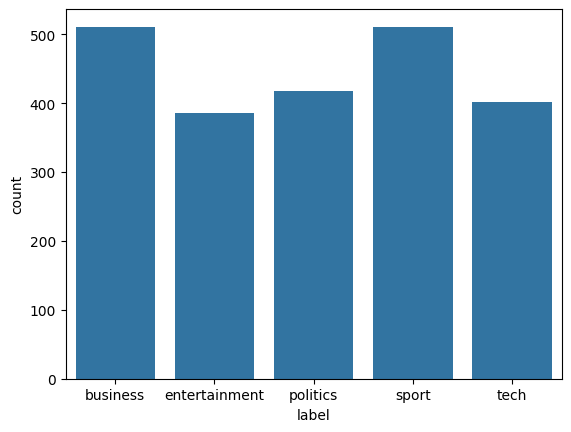

In [31]:
sns.countplot(df,x='label')

# Identify Input and Output

In [32]:
y=df['label']
X=df[['news_article']]

In [33]:
# Splitting into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.head()

,news_article
1490,Cole refuses to blame van Persie Ashley Cole ...
2001,Slimmer PlayStation triple sales Sony PlaySta...
1572,Bellamy fined after row Newcastle have fined ...
1840,Finding new homes for old phones Re-using old...
610,Sundance to honour foreign films Internationa...


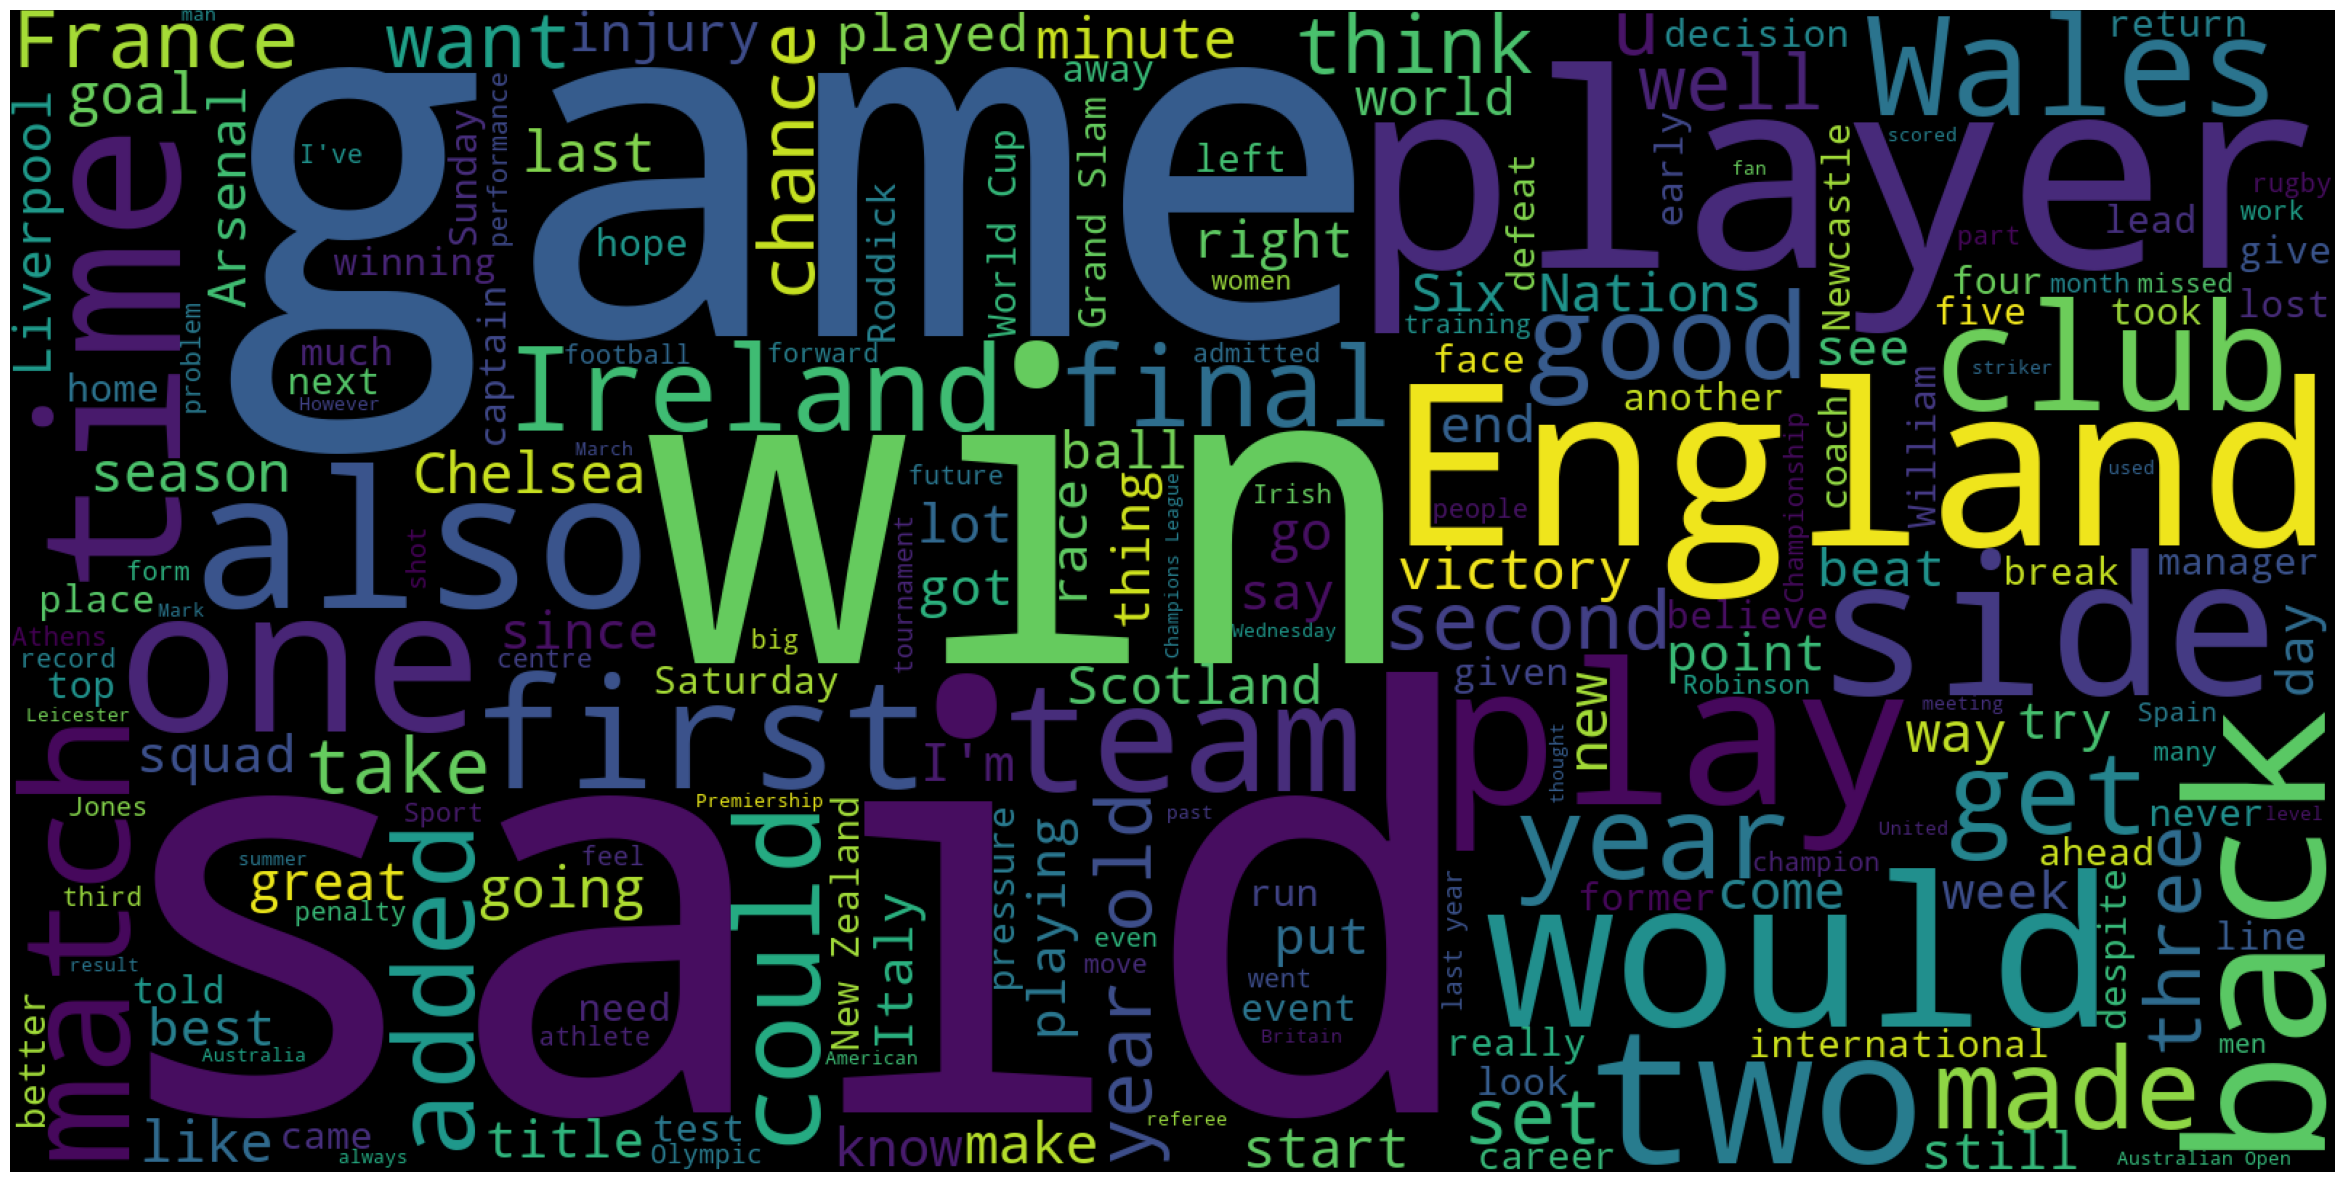

In [35]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
text= " ".join(X_train.loc[y_train=='sport','news_article'])

wordcloud=WordCloud(stopwords=stopwords.words('english'),background_color='black',width=1600,height=800).generate(text)

plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# Data Prepration - Text Preprocessing

In [36]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [37]:
## initialise the inbuilt Stemmer
stemmer=PorterStemmer()

In [38]:
## We can also use Lemmatizer instead of Stemmer
lematizer=WordNetLemmatizer()

In [39]:
def preprocess(raw_text,flag):
    # Removing special characters and digits
    sentence=re.sub("[^a-zA-Z]"," ",raw_text)
    # change sentence to lower case
    sentence= sentence.lower()
    # tokenize into words
    tokens=sentence.split()
     # remove stop words 
    clean_tokens=[word for word in tokens if not word in stopwords.words('english') ]
    # Stemming/Lemmatization
    if(flag=='stem'):
        clean_tokens=[stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens=[lematizer.lemmatize(word) for word in clean_tokens]
        
    return pd.Series([''.join(clean_tokens),len(clean_tokens)])

In [40]:
from tqdm import tqdm ,tqdm_notebook
tqdm.pandas()

In [41]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
tem_df=X_train['news_article'].progress_apply(lambda x: preprocess(x,'lemma'))
tem_df.head()

100%|██████████| 1780/1780 [16:52<00:00,  1.76it/s]


,0,1
1490,colerefuseblamevanpersieashleycolerefusedblame...,135
2001,slimmerplaystationtriplesalesonyplaystationsli...,270
1572,bellamyfinedrownewcastlefinedwelshstrikercraig...,235
1840,findingnewhomeoldphoneusingoldmobilephonegoode...,292
610,sundancehonourforeignfilminternationalfilmgive...,200


In [42]:
tem_df.columns=['clean_text_lemma','text_length_lemma']
X_train=pd.concat([X_train,tem_df],axis=1)
X_train.head()

,news_article,clean_text_lemma,text_length_lemma
1490,Cole refuses to blame van Persie Ashley Cole ...,colerefuseblamevanpersieashleycolerefusedblame...,135
2001,Slimmer PlayStation triple sales Sony PlaySta...,slimmerplaystationtriplesalesonyplaystationsli...,270
1572,Bellamy fined after row Newcastle have fined ...,bellamyfinedrownewcastlefinedwelshstrikercraig...,235
1840,Finding new homes for old phones Re-using old...,findingnewhomeoldphoneusingoldmobilephonegoode...,292
610,Sundance to honour foreign films Internationa...,sundancehonourforeignfilminternationalfilmgive...,200


# Converting Text to Numerical vectors - BOW Representation

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vocab=CountVectorizer()
X_train_bow= vocab.fit_transform(X_train['clean_text_lemma'])


In [61]:
X_train_bow

<1780x1711 sparse matrix of type '<class 'numpy.int64'>'
	with 1780 stored elements in Compressed Sparse Row format>

In [62]:
print('Total unique words:',len(vocab.vocabulary_))
print('Type of train features:',type(X_train_bow))
print('Shape of input data:',X_train_bow.shape)

Total unique words: 1711
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (1780, 1711)


# (OPTIONAL) Visualizing High Dimensional Data using PCA and t-sne

<Axes: xlabel='feature_1', ylabel='feature_2'>

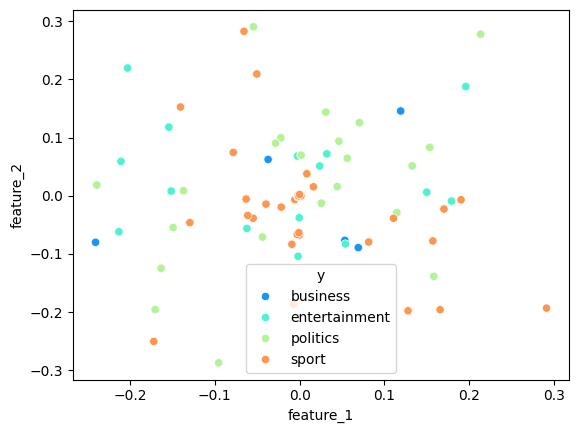

In [63]:
# Normalizing the BOW representation of Text Data
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

# Assuming X_train_bow is your BoW matrix
X_normalize= normalize(X_train_bow.toarray())

# Apply PCA to the normalized data
pca=PCA(n_components=2)
X_low_dim= pca.fit_transform(X_normalize)

df_low_dim=pd.DataFrame(X_low_dim,columns=['feature_1','feature_2'])
df_low_dim['y']=y

sns.scatterplot(data=df_low_dim,x='feature_1',y='feature_2',hue='y',palette='rainbow')

<Axes: xlabel='feature_1', ylabel='feature_2'>

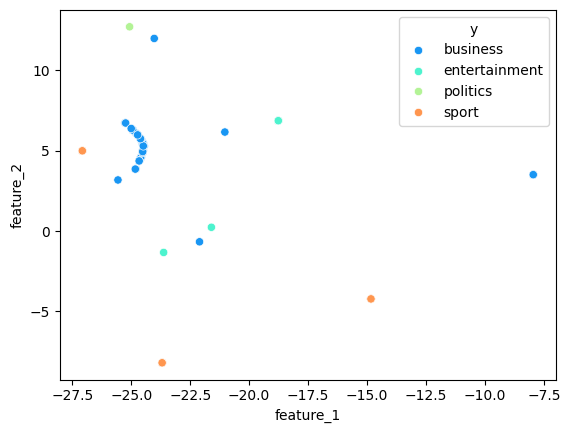

In [64]:
from sklearn.manifold import TSNE
# Assuming X_train_bow is your BoW matrix
X_normalize=normalize(X_train_bow.toarray())

tsne=TSNE(init='random',n_components=2)

X_low_dim= tsne.fit_transform(X_normalize)

df_low_dim=pd.DataFrame(X_low_dim,columns=['feature_1',"feature_2"])
df_low_dim['y']=y

sns.scatterplot(df_low_dim,x='feature_1',y="feature_2",hue='y',palette='rainbow')

# Preprocessing Test Data

In [49]:
tem_df=X_test['news_article'].progress_apply(lambda x:preprocess(x,'lemma'))
tem_df.columns=['clean_text_lemma','text_length_lemma']
X_test=pd.concat([tem_df,X_test],axis=1)
X_test.head()

100%|██████████| 445/445 [04:57<00:00,  1.50it/s]


,clean_text_lemma,text_length_lemma,news_article
414,ukhousepricedipnovemberukhousepricedippedsligh...,217,UK house prices dip in November UK house pric...
420,lsesetdatetakeoverdeallondonstockexchangelsepl...,224,LSE 'sets date for takeover deal' The London ...
1644,harinordoquysuffersfranceaxenumbereightimanolh...,230,Harinordoquy suffers France axe Number eight ...
416,barclayssharemergertalkshareukbankinggroupbarc...,162,Barclays shares up on merger talk Shares in U...
1232,campaigncoldcallquestionedlabourconservativest...,305,Campaign 'cold calls' questioned Labour and t...


In [50]:
X_test_bow= vocab.transform(X_test["clean_text_lemma"])

# Naive Bayes

In [53]:
from sklearn.naive_bayes import  MultinomialNB
from sklearn import metrics
classifier= MultinomialNB()
classifier.fit(X_train_bow,y_train)

y_test_pred=classifier.predict(X_test_bow)
print(metrics.accuracy_score(y_test,y_test_pred))

0.3056179775280899


In [54]:
print(metrics.classification_report(y_test,y_test_pred))

               precision    recall  f1-score   support

     business       1.00      0.02      0.03       115
entertainment       1.00      0.14      0.24        72
     politics       1.00      0.09      0.17        76
        sport       0.25      1.00      0.40       102
         tech       1.00      0.19      0.32        80

     accuracy                           0.31       445
    macro avg       0.85      0.29      0.23       445
 weighted avg       0.83      0.31      0.23       445



In [55]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[  2,   0,   0, 113,   0],
       [  0,  10,   0,  62,   0],
       [  0,   0,   7,  69,   0],
       [  0,   0,   0, 102,   0],
       [  0,   0,   0,  65,  15]], dtype=int64)

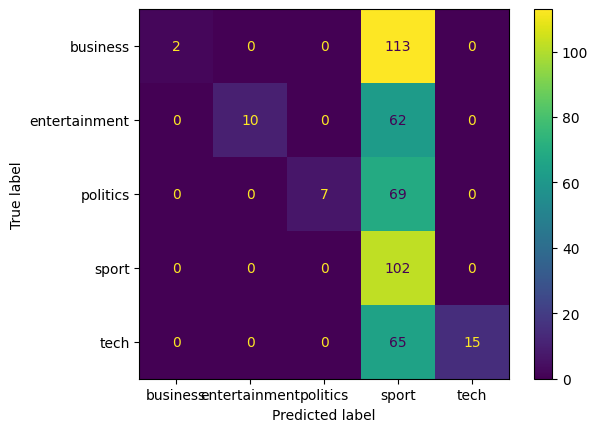

In [57]:
cm=metrics.confusion_matrix(y_test,y_test_pred,labels=classifier.classes_)
fig=metrics.ConfusionMatrixDisplay(cm,display_labels=classifier.classes_)
fig.plot()

In [58]:
actual=np.sum(cm,axis=1).reshape(-1,1)
cmn=np.round(cm/actual,2)
print('Normalize Confusion matrix:')
print(cmn)

Normalize Confusion matrix:
[[0.02 0.   0.   0.98 0.  ]
 [0.   0.14 0.   0.86 0.  ]
 [0.   0.   0.09 0.91 0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.81 0.19]]


Text(50.72222222222221, 0.5, 'Actual')

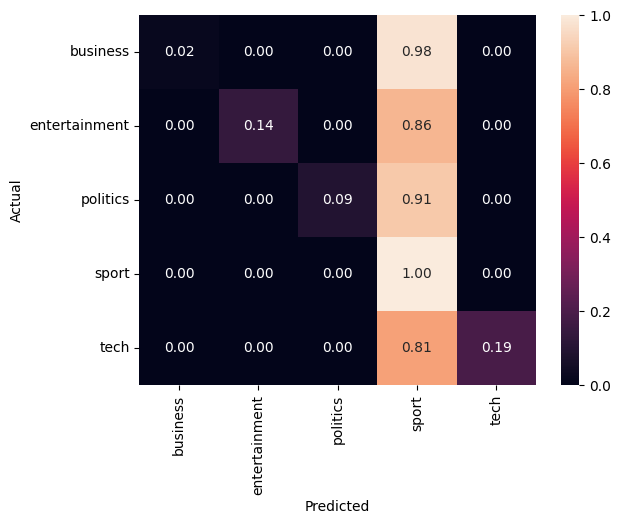

In [60]:
sns.heatmap(cmn,annot=True,fmt='.2f',xticklabels=classifier.classes_,yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')